<a href="https://colab.research.google.com/github/nishant-jhaa/Alzheimer/blob/main/Alzhiemer's__Bioactivity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Computational Screening of Bioactivity Compounds- Alzhiemer's Bioactivity Prediction [Part-1] Download Data from ChemBL Database**

In [1]:
! pip install chembl_webresource_client # installing ChEMBL web service package to retrieve bioactivity data from the ChEMBL Database.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 3.6 MB/s 
     |████████████████████████████████| 60 kB 9.9 MB/s 
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [2]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

*Searching for Target Protien- Single Protien Beta Amyloid A4 9606 is used for the project*

In [6]:
# Target search for Alzheimer's
target = new_client.target
target_query = target.search('alzheimer')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Nucleosome-remodeling factor subunit BPTF,13.0,False,CHEMBL3085621,"[{'accession': 'Q12830', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Rattus norvegicus,Amyloid beta A4 protein,9.0,False,CHEMBL3638365,"[{'accession': 'P08592', 'component_descriptio...",SINGLE PROTEIN,10116
2,[],Mus musculus,Amyloid-beta A4 protein,8.0,False,CHEMBL4523942,"[{'accession': 'P12023', 'component_descriptio...",SINGLE PROTEIN,10090
3,"[{'xref_id': 'P05067', 'xref_name': None, 'xre...",Homo sapiens,Beta amyloid A4 protein,7.0,False,CHEMBL2487,"[{'accession': 'P05067', 'component_descriptio...",SINGLE PROTEIN,9606


In [7]:
#Selecting the human beta amyloid
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL2487'

In [8]:
#Bioactivity data for target protein reported as pChEMBL values as IC50 nM
#Making sure we dont have a mixture of bioactivity units
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type = "IC50")
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,Not Active,23349223,[],CHEMBL4882623,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,1600.0
1444,Active,23349820,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,31.0
1445,Active,23349821,[],CHEMBL4882626,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,131.0
1446,Not Active,23349832,[],CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,µM,None,None,10.0


In [9]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [10]:
#Save data to csv
df.to_csv("alzhiemer_raw_bioactivity_data.csv", index = False)

*Handling for Missing Data (if any)*

In [11]:
#Dropping columns with missing standard_value and canonical_smiles
#standard value represents the potency of the drug (concentration of drug; lower is better)
#Canonical refers to the bonding structure of molecule and SMILES is a linear text format
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,Not Active,23349223,[],CHEMBL4882623,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,1600.0
1444,Active,23349820,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,31.0
1445,Active,23349821,[],CHEMBL4882626,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,131.0
1446,Not Active,23349832,[],CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,µM,None,None,10.0


In [12]:
len(df2.canonical_smiles.unique())
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,357577,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,5.0
1,None,357580,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,2.7
2,None,358965,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.8
3,None,368887,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,11.0
4,None,375954,[],CHEMBL678443,Inhibition of A-beta-42 production by inhibiti...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,None,23313078,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4844515,Inhibition of HFIP-pretreated human recombinan...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,uM,UO_0000065,None,1.38
1440,Active,23349220,[],CHEMBL4882622,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,0.5
1443,Not Active,23349223,[],CHEMBL4882623,Aβ40 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,1600.0
1444,Active,23349820,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4882625,Aβ42 inhibition assay,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Beta amyloid A4 protein,9606,None,None,IC50,nM,UO_0000065,None,31.0


**Preprocessing of the Data- Data Labelling as Active, Inactive, Internediate**

In [13]:
#Combining 3 columns (molecule_chmebl_id, canonical_smiles, standard_value) and bioactivity_class into DF
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0
...,...,...,...
1439,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0
1440,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5
1443,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0
1444,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0


In [14]:
#Saving dataframe to csv
df3.to_csv('alzhiemers_preprocessed_data.csv', index = False)

In [15]:
#Implementing the 3 Class Labelling 
df4 = pd.read_csv('alzhiemers_preprocessed_data.csv')

bioactivity_threshold = []
for i in df4.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")
        
bioactivity_class = pd.Series(bioactivity_threshold, name = 'class')
df5 = pd.concat([df4, bioactivity_class], axis = 1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive
...,...,...,...,...
1079,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0,intermediate
1080,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active
1081,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate
1082,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active


In [16]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

In [17]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

In [18]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [19]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [20]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,10000.0
...,...,...,...,...
1079,CHEMBL374055,COc1ccc(-c2cc(=O)c3c(O)cc(OC)c(-c4cc(-c5cc(=O)...,intermediate,20100.0
1080,CHEMBL1208903,COc1ccc(-c2cc(=O)c3c(O)cc(O)c(-c4cc(-c5cc(=O)c...,active,10100.0
1081,CHEMBL208988,COc1ccc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc1-c1c(OC)c...,intermediate,50000.0
1082,CHEMBL377324,COc1cc(O)c2c(=O)cc(-c3ccc(OC)c(-c4c(O)cc(O)c5c...,active,13200.0


In [21]:
df5.to_csv('alzheimer_bioactivity_data_curated.csv', index = False)

In [22]:
!zip alzhiemer.zip *.csv

  adding: alzheimer_bioactivity_data_curated.csv (deflated 82%)
  adding: alzhiemer_raw_bioactivity_data.csv (deflated 92%)
  adding: alzhiemers_preprocessed_data.csv (deflated 81%)


In [23]:
ls -l

total 1168
-rw-r--r-- 1 root root  93840 Aug 27 06:00 alzheimer_bioactivity_data_curated.csv
-rw-r--r-- 1 root root 899490 Aug 27 05:59 alzhiemer_raw_bioactivity_data.csv
-rw-r--r-- 1 root root  83632 Aug 27 05:59 alzhiemers_preprocessed_data.csv
-rw-r--r-- 1 root root 106504 Aug 27 06:00 alzhiemer.zip
drwxr-xr-x 1 root root   4096 Aug 15 13:44 sample_data/


**Exploratory Data Analysis-EDA [Part-2]**

In [24]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-08-27 06:00:15--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   201MB/s    in 0.4s    

2022-08-27 06:00:15 (201 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

**Load Data**

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('alzhiemers_preprocessed_data.csv')

In [27]:
import pandas as pd
df = pd.read_csv('alzheimer_bioactivity_data_curated.csv')
df_no_smiles = df.drop(columns='canonical_smiles')
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL311039,5000.0,intermediate,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1
1,CHEMBL450926,2700.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1
2,CHEMBL310242,1800.0,intermediate,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
3,CHEMBL74874,11000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
4,CHEMBL75183,10000.0,inactive,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...
...,...,...,...,...
1079,CHEMBL4845823,1380.0,intermediate,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...
1080,CHEMBL1091513,0.5,active,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...
1081,CHEMBL4558518,1600.0,intermediate,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...
1082,CHEMBL3609637,31.0,active,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...


**Calculation of Lipinski Descriptors**

In [28]:
#Import Libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [29]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [30]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,311.422,3.31880,1.0,2.0
1,299.461,3.24120,1.0,3.0
2,311.422,3.31880,1.0,2.0
3,327.877,3.83310,1.0,2.0
4,372.328,3.94220,1.0,2.0
...,...,...,...,...
1079,550.681,4.08700,2.0,8.0
1080,517.925,4.66920,1.0,4.0
1081,569.114,6.21910,1.0,5.0
1082,514.483,4.66972,0.0,7.0


In [31]:
#Combine standard value with lipinksi descriptors
df_combined = pd.concat([df,df_lipinski], axis=1) 
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,5000.0,intermediate,311.422,3.31880,1.0,2.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,2700.0,intermediate,299.461,3.24120,1.0,3.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,1800.0,intermediate,311.422,3.31880,1.0,2.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,11000.0,inactive,327.877,3.83310,1.0,2.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,10000.0,inactive,372.328,3.94220,1.0,2.0
...,...,...,...,...,...,...,...,...
1079,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,1380.0,intermediate,550.681,4.08700,2.0,8.0
1080,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,0.5,active,517.925,4.66920,1.0,4.0
1081,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,1600.0,intermediate,569.114,6.21910,1.0,5.0
1082,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,31.0,active,514.483,4.66972,0.0,7.0


**Conversion of IC50 to PIC50**

In [32]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [33]:
df_combined.standard_value.describe()


count      1084.000000
mean      21890.718358
std       56173.530263
min          -1.000000
25%         210.000000
50%        4645.000000
75%       18107.500000
max      800000.000000
Name: standard_value, dtype: float64

In [34]:
-np.log10( (10**-9)* 100000000 )

1.0

In [35]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [36]:
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [37]:
df_norm = norm_value(df_combined)
df_norm


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5000.0
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,2700.0
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,1800.0
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,11000.0
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,10000.0
...,...,...,...,...,...,...,...,...
1079,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,intermediate,550.681,4.08700,2.0,8.0,1380.0
1080,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,0.5
1081,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,569.114,6.21910,1.0,5.0,1600.0
1082,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,31.0


In [38]:
df_norm.standard_value_norm.describe()


count      1084.000000
mean      21890.718358
std       56173.530263
min          -1.000000
25%         210.000000
50%        4645.000000
75%       18107.500000
max      800000.000000
Name: standard_value_norm, dtype: float64

In [39]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...
1079,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,intermediate,550.681,4.08700,2.0,8.0,5.860121
1080,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,9.301030
1081,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,569.114,6.21910,1.0,5.0,5.795880
1082,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,7.508638


In [40]:
df_final.pIC50.describe()

count    1083.000000
mean        5.696202
std         1.301880
min         3.096910
25%         4.740773
50%         5.328827
75%         6.677781
max         9.522879
Name: pIC50, dtype: float64

In [41]:
df_final.to_csv('alzhiemer_bioactivity_data_pIC50.csv')

In [42]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
5,CHEMBL563,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,inactive,244.265,3.68080,1.0,1.0,3.515700
6,CHEMBL196279,CC(C(=O)O)c1ccc(-c2ccc(Cl)c(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.124939
7,CHEMBL195970,CC(C(=O)O)c1ccc(-c2cc(Cl)cc(Cl)c2)c(F)c1,inactive,313.155,4.98760,1.0,1.0,4.113509
...,...,...,...,...,...,...,...,...
1076,CHEMBL4877566,COC(=O)c1c(C)c(C/C=C(\C)CC/C=C(\C)CCC=C(C)C)c(...,inactive,416.558,6.16312,2.0,5.0,4.298432
1077,CHEMBL378225,C[C@@H](NC(=O)c1cc(C(=O)N[C@@H](Cc2ccccc2)[C@H...,inactive,578.735,3.02740,4.0,6.0,4.000000
1080,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,9.301030
1082,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,7.508638


In [43]:
df_2class.to_csv('alzhiemer_bioactivity_no_intermediates_pIC50.csv')

**(Chemical Space Analysis) with Lipinksi Descriptors**

In [44]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

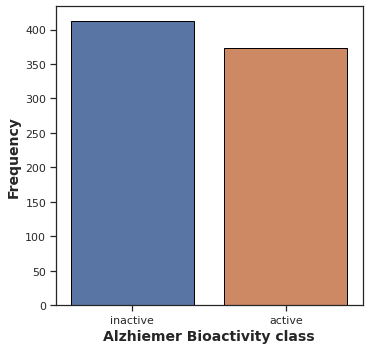

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Alzhiemer Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

**Both bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP
**

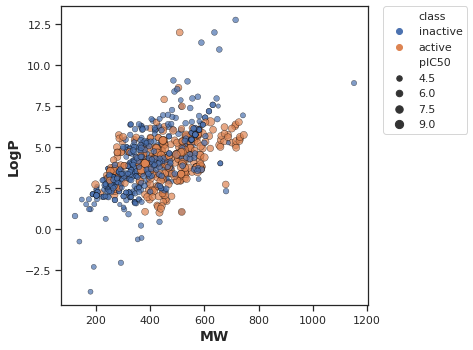

In [46]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**pIC50 Box Plot**

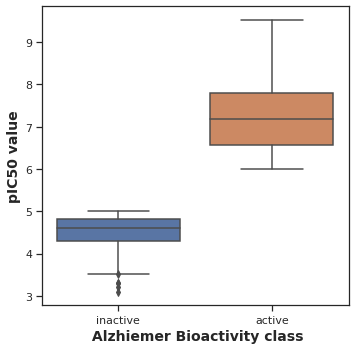

In [47]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel(' Alzhiemer Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Mann Whitney Statistical Analysis Test**

In [48]:
def mannwhitney(descriptor, verbose=False):
# https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

**MW**

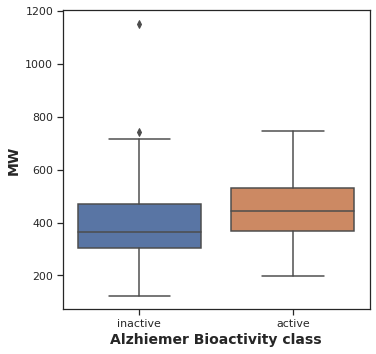

In [49]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Alzhiemer Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [50]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,97214.5,2.127437e-10,0.05,Different distribution (reject H0)


**LogP**

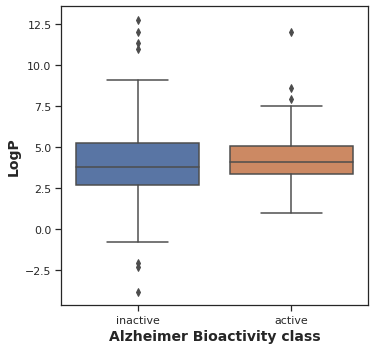

In [51]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Alzheimer Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [52]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,83962.0,0.029076,0.05,Different distribution (reject H0)


**NumH Donors**

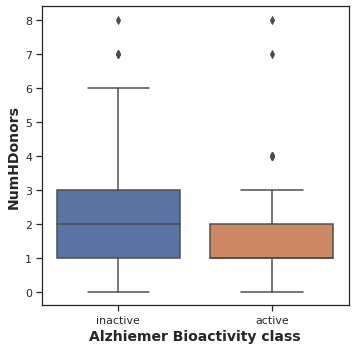

In [53]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Alzhiemer Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [54]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,57225.5,1.235990e-10,0.05,Different distribution (reject H0)


**NumH Acceptors**

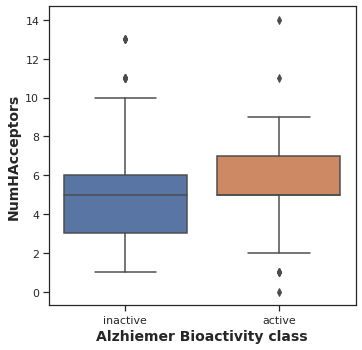

In [55]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Alzhiemer Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [56]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,94902.0,1.097479e-08,0.05,Different distribution (reject H0)


In [57]:
! zip -r results.zip . -i *.csv *.pdf

  adding: plot_MW.pdf (deflated 37%)
  adding: plot_MW_vs_LogP.pdf (deflated 4%)
  adding: alzhiemers_preprocessed_data.csv (deflated 81%)
  adding: alzhiemer_raw_bioactivity_data.csv (deflated 92%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: alzhiemer_bioactivity_no_intermediates_pIC50.csv (deflated 76%)
  adding: alzhiemer_bioactivity_data_pIC50.csv (deflated 77%)
  adding: plot_LogP.pdf (deflated 39%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: alzheimer_bioactivity_data_curated.csv (deflated 82%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)


**[Part-3] Calculation of Fingerprint Descriptors**

In [58]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-08-27 06:17:38--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-08-27 06:17:38--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-08-27 06:17:38 (234 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-08-27 06:17:38--  https://github

In [59]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

**load the bioactivity data again**

In [60]:
import pandas as pd
df3 = pd.read_csv("alzhiemer_bioactivity_data_pIC50.csv")
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL311039,CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1,intermediate,311.422,3.31880,1.0,2.0,5.301030
1,1,CHEMBL450926,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1,intermediate,299.461,3.24120,1.0,3.0,5.568636
2,2,CHEMBL310242,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,intermediate,311.422,3.31880,1.0,2.0,5.744727
3,3,CHEMBL74874,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,327.877,3.83310,1.0,2.0,4.958607
4,4,CHEMBL75183,CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(...,inactive,372.328,3.94220,1.0,2.0,5.000000
...,...,...,...,...,...,...,...,...,...
1079,1079,CHEMBL4845823,CCN(C)C(=O)Oc1cccc(CNCCNCCOc2cccc3c2ccn3S(=O)(...,intermediate,550.681,4.08700,2.0,8.0,5.860121
1080,1080,CHEMBL1091513,O=S(=O)(NC1CCC(c2cc(F)ccc2F)(S(=O)(=O)c2ccc(Cl...,active,517.925,4.66920,1.0,4.0,9.301030
1081,1081,CHEMBL4558518,CC(C)(C)OC(=O)N1CCCC1CNC1CCC(c2cc(F)ccc2F)(S(=...,intermediate,569.114,6.21910,1.0,5.0,5.795880
1082,1082,CHEMBL3609637,COc1cc(-c2cn(C3CCc4c(F)cccc4N(CC(F)(F)F)C3=O)n...,active,514.483,4.66972,0.0,7.0,7.508638


In [61]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [62]:
! cat molecule.smi | head -5

CC12CCC(C1)C(C)(C)C2NS(=O)(=O)c1ccc(F)cc1	CHEMBL311039
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1cccs1	CHEMBL450926
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(F)cc1	CHEMBL310242
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Cl)cc1	CHEMBL74874
CC12CC[C@@H](C1)C(C)(C)[C@@H]2NS(=O)(=O)c1ccc(Br)cc1	CHEMBL75183


In [63]:
! cat molecule.smi | wc -l

1084


**Calculation of Fingerprint Descriptors**

In [64]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [65]:
! bash padel.sh

Processing CHEMBL311039 in molecule.smi (1/1084). 
Processing CHEMBL450926 in molecule.smi (2/1084). 
Processing CHEMBL310242 in molecule.smi (3/1084). Average speed: 2.84 s/mol.
Processing CHEMBL74874 in molecule.smi (4/1084). Average speed: 1.51 s/mol.
Processing CHEMBL563 in molecule.smi (6/1084). Average speed: 0.94 s/mol.
Processing CHEMBL75183 in molecule.smi (5/1084). Average speed: 1.20 s/mol.
Processing CHEMBL196279 in molecule.smi (7/1084). Average speed: 0.88 s/mol.
Processing CHEMBL195970 in molecule.smi (8/1084). Average speed: 0.75 s/mol.
Processing CHEMBL193971 in molecule.smi (10/1084). Average speed: 0.65 s/mol.
Processing CHEMBL264006 in molecule.smi (9/1084). Average speed: 0.74 s/mol.
Processing CHEMBL194274 in molecule.smi (11/1084). Average speed: 0.64 s/mol.
Processing CHEMBL196322 in molecule.smi (13/1084). Average speed: 0.66 s/mol.
Processing CHEMBL196321 in molecule.smi (12/1084). Average speed: 0.61 s/mol.
Processing CHEMBL380778 in molecule.smi (14/1084). A

In [66]:
! ls -l

total 112280
-rw-r--r-- 1 root root    93840 Aug 27 06:00 alzheimer_bioactivity_data_curated.csv
-rw-r--r-- 1 root root   155127 Aug 27 06:15 alzhiemer_bioactivity_data_pIC50.csv
-rw-r--r-- 1 root root   111594 Aug 27 06:15 alzhiemer_bioactivity_no_intermediates_pIC50.csv
-rw-r--r-- 1 root root   899490 Aug 27 05:59 alzhiemer_raw_bioactivity_data.csv
-rw-r--r-- 1 root root    83632 Aug 27 05:59 alzhiemers_preprocessed_data.csv
-rw-r--r-- 1 root root   106504 Aug 27 06:00 alzhiemer.zip
-rw-r--r-- 1 root root  1938351 Aug 27 06:24 descriptors_output.csv
drwxr-xr-x 3 root root     4096 Aug 27 06:17 __MACOSX
-rw-r--r-- 1 root root      122 Aug 27 06:16 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      122 Aug 27 06:16 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root      133 Aug 27 06:16 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      130 Aug 27 06:16 mannwhitneyu_NumHDonors.csv
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root  

**Preparation of X and Y Data Matrix**

In [67]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop(columns = ['Name'])
df3_X


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1080,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1081,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
#Convert IC50 to pIC50
df3_Y = df3['pIC50']
df3_Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1079    5.860121
1080    9.301030
1081    5.795880
1082    7.508638
1083    8.000000
Name: pIC50, Length: 1084, dtype: float64

In [69]:
dataset3 = pd.concat([df3_X,df3_Y], axis = 1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.860121
1080,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.301030
1081,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
1082,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [70]:
dataset3.to_csv('alzhiemer_bioactivity_data_pIC50_pubchem_fp.csv', index = False)

**Regression Model [Part-4]**

In [71]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [72]:
df = pd.read_csv('alzhiemer_bioactivity_data_pIC50_pubchem_fp.csv')

In [73]:
X = df.drop('pIC50', axis = 1)
#X = X.drop('Name', axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1080,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1081,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1082,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
Y = df.pIC50
Y

0       5.301030
1       5.568636
2       5.744727
3       4.958607
4       5.000000
          ...   
1079    5.860121
1080    9.301030
1081    5.795880
1082    7.508638
1083    8.000000
Name: pIC50, Length: 1084, dtype: float64

In [82]:
X.shape

(1084, 169)

In [83]:
Y.shape

(1084,)

In [84]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [85]:
X.shape

(1084, 169)

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [113]:
X_train.shape, Y_train.shape

((108, 169), (108,))

In [114]:
X_test.shape, Y_test.shape

((976, 169), (976,))

In [125]:
import numpy as np
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)#refer edureka blog to resolve the 
model.fit(X_train, Y_train.fillna(Y_train.mean()))
r2 = model.score(X_test, Y_test.fillna(Y_test.mean()))
r2

0.7072376440243999

In [126]:
Y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

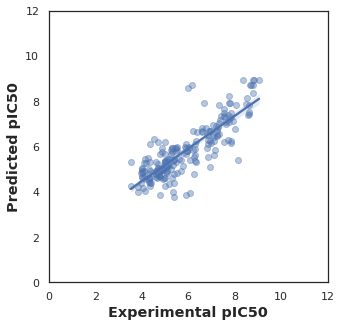

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

**Hyperparameter Tuning**

In [130]:
from sklearn.model_selection import GridSearchCV
import numpy as np

max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)

rf = RandomForestRegressor()

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [132]:
grid.fit(X_train, Y_train.fillna(Y_train.mean()))

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [133]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 4, 'n_estimators': 60} with a score of 0.67


In [134]:
import pandas as pd

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),pd.DataFrame(grid.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
grid_results.head()

,max_features,n_estimators,Accuracy
0,1,10,0.627654
1,1,20,0.639009
2,1,30,0.645497
3,1,40,0.665225
4,1,50,0.663861


In [135]:
grid_contour = grid_results.groupby(['max_features','n_estimators']).mean()
grid_contour

Accuracy
max_features n_estimators          
1            10            0.627654
             20            0.639009
             30            0.645497
             40            0.665225
             50            0.663861
...                             ...
5            160           0.665995
             170           0.666249
             180           0.666550
             190           0.667820
             200           0.670926

[100 rows x 1 columns]

In [136]:
grid_reset = grid_contour.reset_index()
grid_reset.columns = ['max_features', 'n_estimators', 'Accuracy']
grid_pivot = grid_reset.pivot('max_features', 'n_estimators')
grid_pivot

Accuracy                                                    \
n_estimators       10        20        30        40        50        60    
max_features                                                               
1             0.627654  0.639009  0.645497  0.665225  0.663861  0.653739   
2             0.624609  0.644233  0.652840  0.644850  0.658753  0.662139   
3             0.631296  0.645091  0.657410  0.661390  0.659518  0.667327   
4             0.634647  0.656706  0.665382  0.654035  0.669689  0.672314   
5             0.624771  0.648347  0.668047  0.662421  0.659307  0.668370   

                                                                          \
n_estimators       70        80        90        100       110       120   
max_features                                                               
1             0.661069  0.660813  0.659363  0.664869  0.657045  0.659954   
2             0.659833  0.662520  0.665636  0.661049  0.667377  0.662254   
3             0.661288  0.669351  0.665697  0.662040  0.660849  0.665176   
4             0.660909  0.661922  0.666118  0.668882  0.665252  0.666910   
5             0.663192  0.667072  0.667608  0.667264  0.663266  0.663702   

                                                                          \
n_estimators       130       140       150       160       170       180   
max_features                                                               
1             0.663278  0.663405  0.662664  0.662069  0.659392  0.665749   
2             0.660999  0.660821  0.666144  0.665342  0.665494  0.659503   
3             0.661959  0.664800  0.664432  0.667922  0.667187  0.669209   
4             0.662823  0.666843  0.666383  0.666460  0.666236  0.663896   
5             0.669805  0.667677  0.668607  0.665995  0.666249  0.666550   

                                  
n_estimators       190       200  
max_features                      
1             0.660670  0.662791  
2             0.664791  0.665909  
3             0.664322  0.669111  
4             0.667109  0.667764  
5             0.667820  0.670926

In [137]:
x = grid_pivot.columns.levels[1].values
y = grid_pivot.index.values
z = grid_pivot.values

In [138]:
import plotly.graph_objects as go

# X and Y axes labels
layout = go.Layout(
            xaxis=go.layout.XAxis(
              title=go.layout.xaxis.Title(
              text='n_estimators')
             ),
             yaxis=go.layout.YAxis(
              title=go.layout.yaxis.Title(
              text='max_features') 
            ) )

fig = go.Figure(data = [go.Contour(z=z, x=x, y=y)], layout=layout )

fig.update_layout(title='Hyperparameter tuning', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()

In [139]:
import plotly.graph_objects as go


fig = go.Figure(data= [go.Surface(z=z, y=y, x=x)], layout=layout )
fig.update_layout(title='Hyperparameter tuning',
                  scene = dict(
                    xaxis_title='n_estimators',
                    yaxis_title='max_features',
                    zaxis_title='Accuracy'),
                  autosize=False,
                  width=800, height=800,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

**Comparative Analysis**